# 1. Import libraries

In [1]:
# to handle datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for text / string processing
import re

# for plotting
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split
# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

# 2. Load data

In [21]:
# load dataset
train_df = pd.read_csv('preprocessed_Train.csv')
test_df = pd.read_csv('preprocessed_Test.csv')
(train_df.shape, test_df.shape)

((668, 17), (223, 17))

In [22]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
0,0,1,1,31.0,1,0,0.500000,0.345603,71.000000,0.720930,0.421687,0.342857,0.153646,2,0,0,0
1,1,2,0,18.0,0,2,0.416667,0.345603,157.888732,0.304348,0.279070,0.382114,0.706767,3,0,0,0
2,0,3,0,9.0,3,2,0.450000,0.345603,157.888732,0.304348,0.123457,0.382114,0.706767,6,0,0,0
3,1,2,0,22.0,1,1,0.450000,0.345603,157.888732,0.304348,0.279070,0.382114,0.795918,3,1,0,0
4,0,3,1,19.0,0,0,0.212500,0.345603,157.888732,0.304348,0.279070,0.382114,0.153646,1,0,0,0


In [6]:
training_vars = [var for var in train_df.columns if var not in ['PassengerId', 'Survived']]
training_vars

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_numerical',
 'Cabin_categorical',
 'Ticket_numerical',
 'Ticket_categorical',
 'Title',
 'Family_size',
 'is_mother',
 'Age_NA',
 'Ticket_numerical_NA']

In [7]:
X_train = train_df[training_vars]
y_train = train_df['Survived']
X_test = test_df[training_vars]
y_test = test_df['Survived']

In [8]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set and then transform it

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
X_train = pd.DataFrame(scaler.transform(X_train[training_vars]),columns=training_vars)
X_test = pd.DataFrame(scaler.transform(X_test[training_vars]),columns=training_vars)

In [10]:
X_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.649701,0.648204,0.407217,0.118263,0.165419,0.420659,0.201604,0.850257,0.177012,0.537077,0.567536,0.357461,0.139222,0.068862,0.203593,0.004491
std,0.420662,0.477889,0.197311,0.225467,0.323889,0.300766,0.385105,0.297637,0.350903,0.300230,0.173565,0.435625,0.236045,0.253410,0.402971,0.066915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.269771,0.000000,0.000000,0.144608,0.000000,1.000000,0.000000,0.321723,0.565577,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.393772,0.000000,0.000000,0.441860,0.000000,1.000000,0.000000,0.483136,0.565577,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.517773,0.250000,0.000000,0.537500,0.194021,1.000000,0.000000,0.772260,0.565577,0.861194,0.166667,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
X_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.668161,0.645740,0.406176,0.131166,0.195067,0.428087,0.216450,0.830670,0.118402,0.522291,0.553289,0.345238,0.159940,0.080717,0.183857,0.004484
std,0.410690,0.479365,0.207786,0.232262,0.353646,0.278005,0.393531,0.333742,0.295223,0.308579,0.183407,0.437591,0.252772,0.273014,0.388239,0.066965
min,0.000000,0.000000,0.004547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.283549,0.000000,0.000000,0.144608,0.000000,1.000000,0.000000,0.321723,0.565577,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.379994,0.000000,0.000000,0.479167,0.000000,1.000000,0.000000,0.616578,0.565577,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.524662,0.250000,0.500000,0.625000,0.194021,1.000000,0.000000,0.766032,0.565577,0.861194,0.250000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train[training_vars], y_train)

pred = rf_model.predict_proba(X_train[training_vars])
y_train_pred = rf_model.predict(X_train[training_vars])
print('Train Accuracy: ', accuracy_score(y_train, list(y_train_pred)))
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = rf_model.predict_proba(X_test[training_vars])
y_test_pred = rf_model.predict(X_test[training_vars])
print('Test Accuracy: ', accuracy_score(y_test, list(y_test_pred)))
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train Accuracy:  0.9925149700598802
RF train roc-auc: 0.9998388197815534
Test Accuracy:  0.8116591928251121
RF test roc-auc: 0.8482855202851808


In [14]:
print(classification_report(y_train, list(y_train_pred)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       412
           1       1.00      0.98      0.99       256

    accuracy                           0.99       668
   macro avg       0.99      0.99      0.99       668
weighted avg       0.99      0.99      0.99       668



In [15]:
print(classification_report(y_test, list(y_test_pred)))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       137
           1       0.82      0.65      0.73        86

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.81       223



### Select threshold for maximum accuracy

In [16]:
tpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
thresholds

array([2.        , 1.        , 0.99      , 0.98      , 0.96      ,
       0.95      , 0.94      , 0.93      , 0.92      , 0.89      ,
       0.88      , 0.87      , 0.86      , 0.84      , 0.82      ,
       0.81      , 0.8       , 0.79      , 0.71      , 0.7       ,
       0.67      , 0.64      , 0.62      , 0.6       , 0.56966667,
       0.56      , 0.54      , 0.51      , 0.49      , 0.48      ,
       0.44      , 0.43      , 0.42      , 0.41      , 0.3815    ,
       0.36      , 0.35      , 0.34      , 0.33      , 0.32      ,
       0.31      , 0.28      , 0.27      , 0.26      , 0.25      ,
       0.23      , 0.21      , 0.2       , 0.19      , 0.1875    ,
       0.18      , 0.1775    , 0.17083333, 0.17      , 0.13      ,
       0.12933333, 0.12      , 0.11333333, 0.11      , 0.1       ,
       0.09      , 0.0825    , 0.08      , 0.07      , 0.06      ,
       0.05      , 0.04      , 0.03666667, 0.03333333, 0.02      ,
       0.01      , 0.005     , 0.        ])

In [17]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(pred[:,1]>thres,1,0)
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
29,0.480000,0.825112
25,0.560000,0.825112
24,0.569667,0.820628
40,0.310000,0.820628
39,0.320000,0.820628


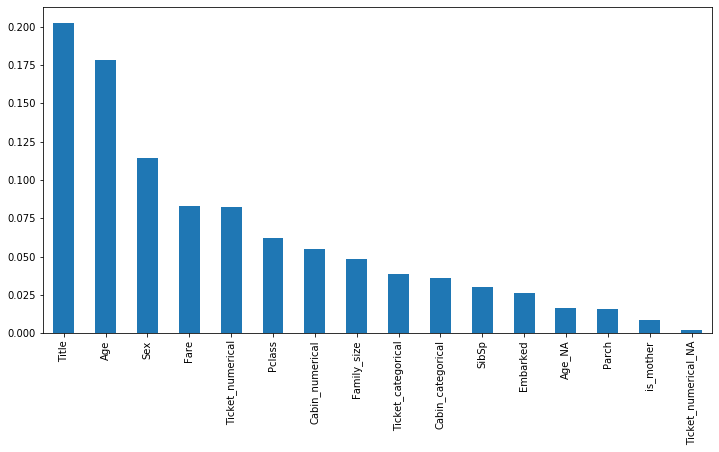

In [20]:
importance = pd.Series(rf_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))